In [1]:
%pip install pandas
%pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
file_path = "data/heart.csv"
data = pd.read_csv(file_path)

# Display the first few rows
print(data.head())

# Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# Separate features (X) and target (y)
target_column = "target"
X = data.drop(columns=[target_column])
y = data[target_column]

print("\nFeatures:\n", X.head())
print("\nTarget:\n", y.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  

Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Features:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0

In [3]:
# Data Exploration

# Summary statistics
print(data.describe())

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

# Check for duplicate rows
duplicates = data.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Drop duplicate rows
data_cleaned = data.drop_duplicates()

# Verify duplicates are removed
duplicates_after = data_cleaned.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicates_after}")

# Save the cleaned dataset 
data_cleaned.to_csv("data/heart_cleaned.csv", index=False)
print("Cleaned dataset saved as 'data/heart_cleaned.csv'")


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.9051

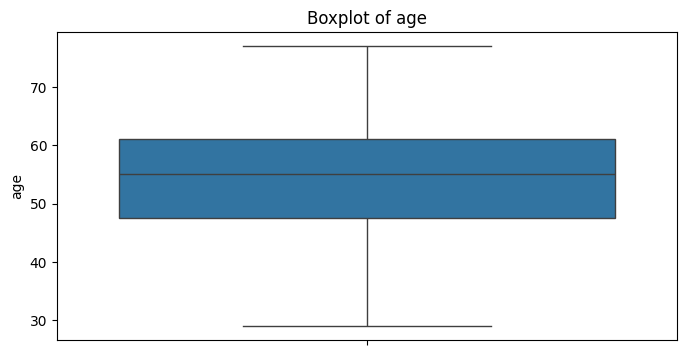

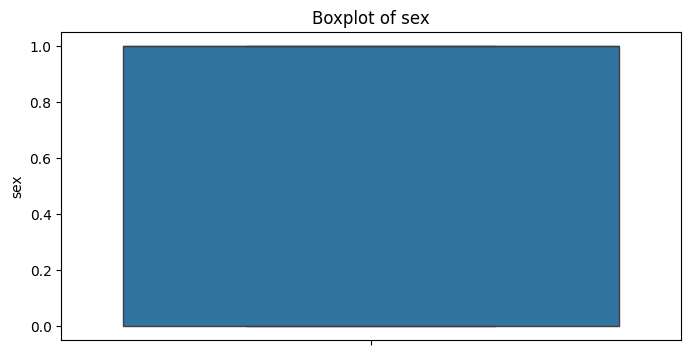

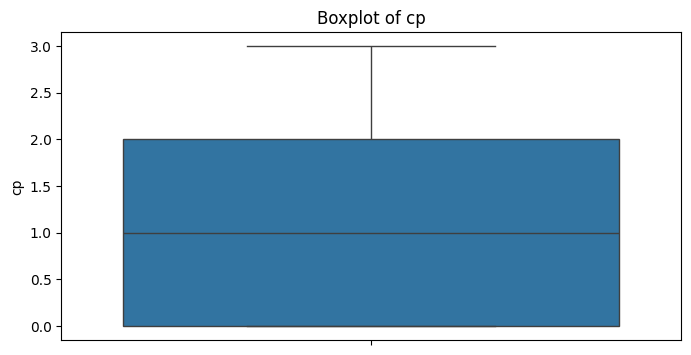

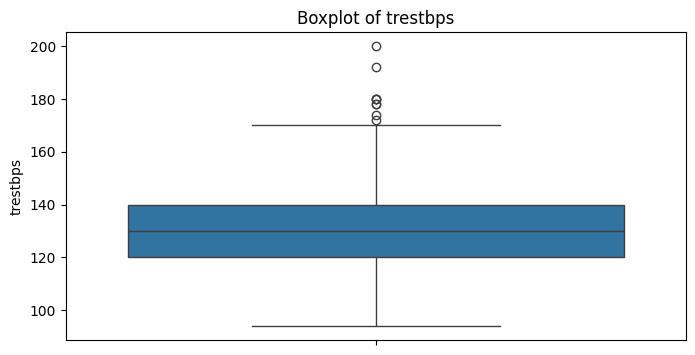

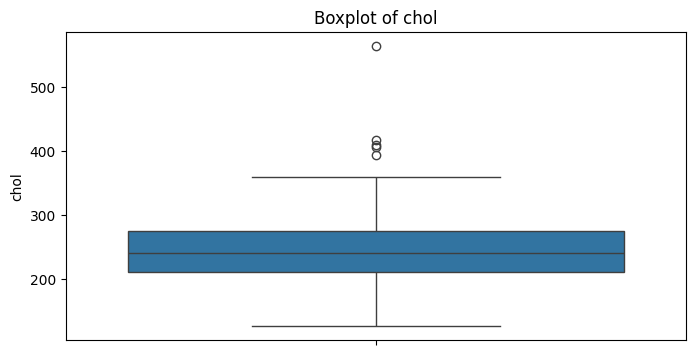

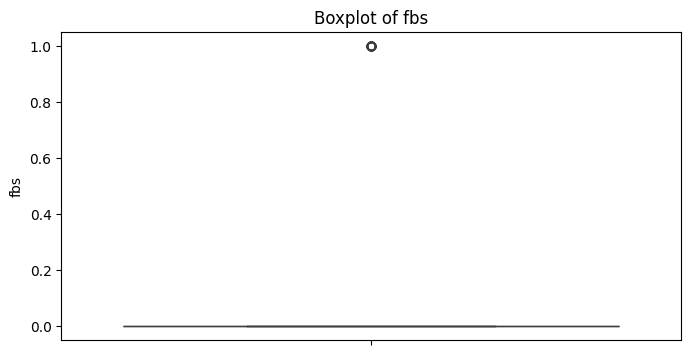

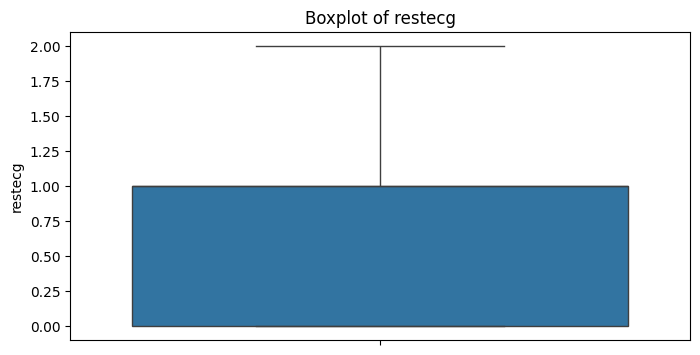

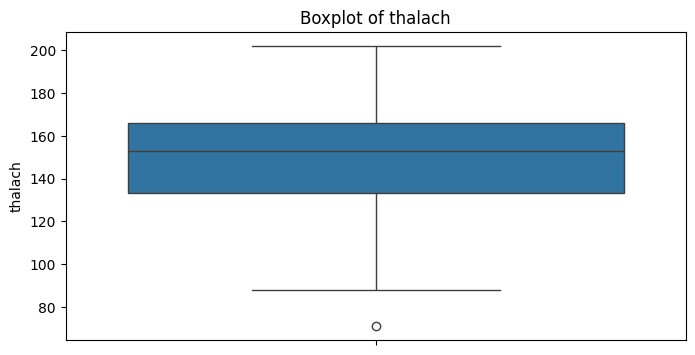

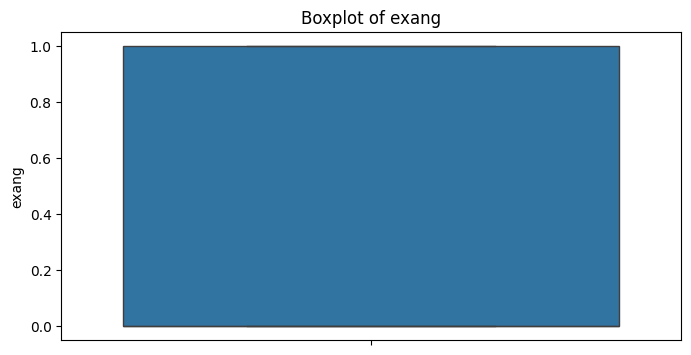

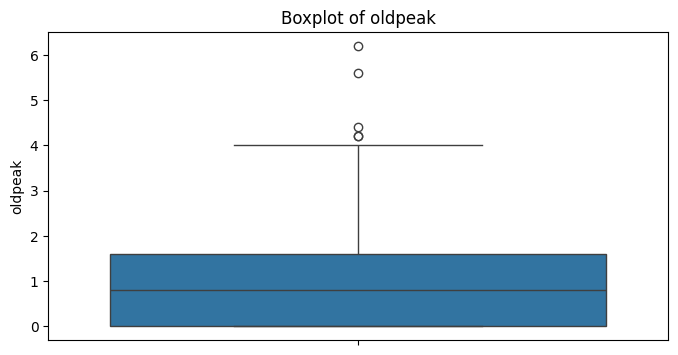

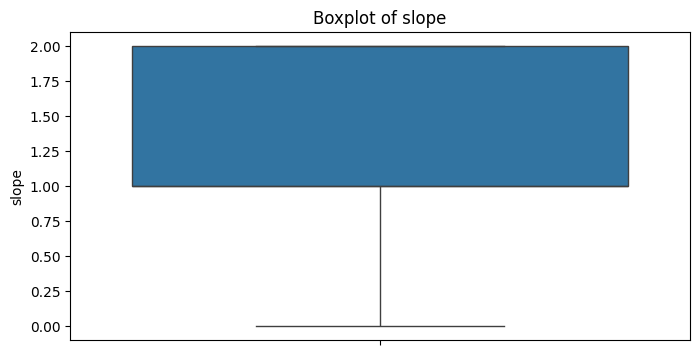

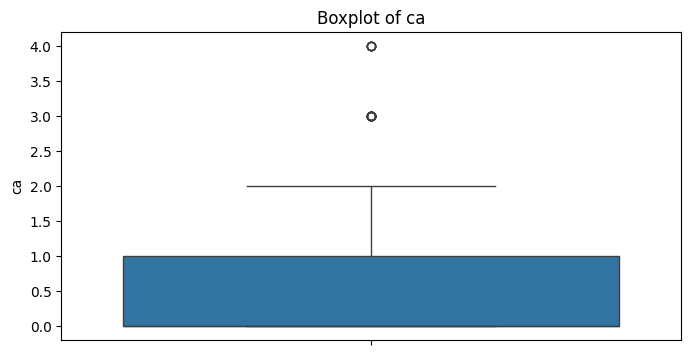

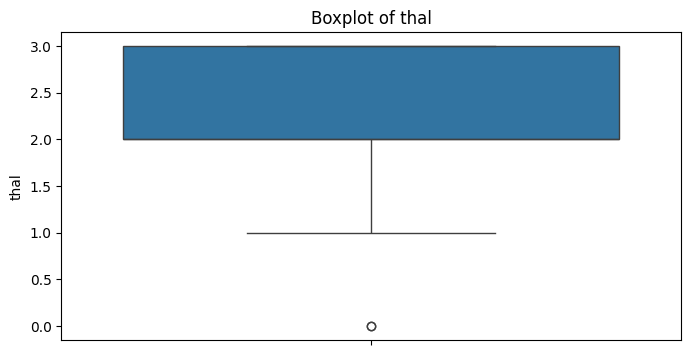

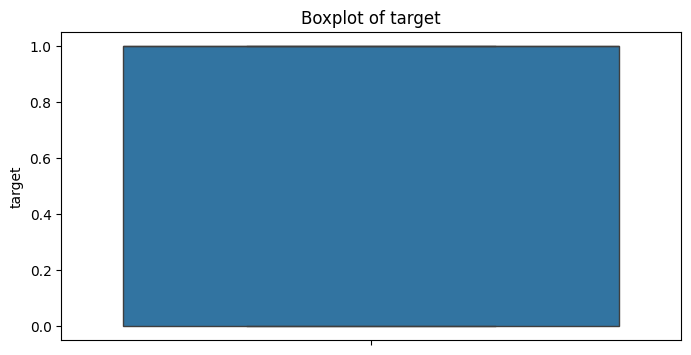

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot boxplots for numerical columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
    plt.show()


In [5]:
# Dealing with outliers

# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Detect outliers for all numerical columns
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    outliers = detect_outliers_iqr(data, column)
    print(f"Outliers in {column}:")
    print(outliers)


Outliers in age:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Outliers in sex:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Outliers in cp:
Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []
Outliers in trestbps:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
8     52    1   2       172   199    1        1      162      0      0.5   
101   59    1   3       178   270    0        0      145      0      4.2   
110   64    0   0       180   325    0        1      154      1      0.0   
203   68    1   2       180   274    1        0      150      1      1.6   
223   56    0   0       200   288    1        0      133      1      4.0   
241   59    0   0       174   249    0        1      143      1      0.0   
248   

In [6]:
# Define caps for each column
caps = {
    'chol': 400,        # Max plausible cholesterol level
    'trestbps': 180,    # Max plausible resting blood pressure
    'thalach': 80,      # Min plausible max heart rate
    'oldpeak': 4.0,     # Max ST depression value
    'ca': 3             # Max number of major vessels
}

# Apply capping
for column, cap in caps.items():
    if column == 'thalach':  # For thalach, cap the minimum
        data[column] = data[column].apply(lambda x: cap if x < cap else x)
    else:  # For other columns, cap the maximum
        data[column] = data[column].apply(lambda x: cap if x > cap else x)

# Investigate 'thal' separately
data['thal'] = data['thal'].apply(lambda x: None if x == 0 else x)  # Treat '0' as missing

# Verify changes
print(data.describe())


              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.518152  245.613861    0.148515   
std      9.082101    0.466011    1.032052   17.190754   48.938596    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  180.000000  400.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.676568    0.326733    1.024422    1.399340    0.712871   
std      0.525860   22.8084

In [7]:
data.to_csv("data/heart_capped.csv", index=False)
print("Cleaned dataset saved as 'data/heart_capped.csv'")


Cleaned dataset saved as 'data/heart_capped.csv'
